In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import torch

sys.path.append(os.path.join(os.getenv("HOME"), "RNN_Manifold/"))
import decode_1d, generate_1d, geometry_util

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("using device {}".format(device))

using device cuda


In [3]:
encoder_2d, decoder_2d, _ = generate_1d.train(0, 1, 2, device, n_training_iterations=7000)

/home/trevor/brainvenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


iteration: 0, decoding loss: 1.638447880744934, distance cost: 0.14298561215400696
iteration: 1, decoding loss: 0.9216154217720032, distance cost: 0.05341605842113495
iteration: 4, decoding loss: 0.7225659489631653, distance cost: 0.07306427508592606
iteration: 14, decoding loss: 0.7016632556915283, distance cost: 0.0926901325583458
iteration: 15, decoding loss: 0.6650179624557495, distance cost: 0.10048581659793854
iteration: 110, decoding loss: 0.6356876492500305, distance cost: 0.10864441096782684
iteration: 140, decoding loss: 0.6544821858406067, distance cost: 0.08720234781503677
iteration: 142, decoding loss: 0.6592722535133362, distance cost: 0.07828514277935028
iteration: 144, decoding loss: 0.6536336541175842, distance cost: 0.07664255052804947
iteration: 151, decoding loss: 0.6453155279159546, distance cost: 0.078337162733078
iteration: 157, decoding loss: 0.6269674301147461, distance cost: 0.0810437798500061
iteration: 158, decoding loss: 0.6083099246025085, distance cost: 0

In [4]:
phases = np.arange(start=-np.pi, stop=np.pi, step=0.01)
phases_torch = torch.tensor(np.expand_dims(phases, -1), dtype=torch.get_default_dtype()).to(device)
with torch.no_grad():
    test_embedding_2d = encoder_2d(phases_torch)
test_embedding_2d = test_embedding_2d.cpu().numpy()

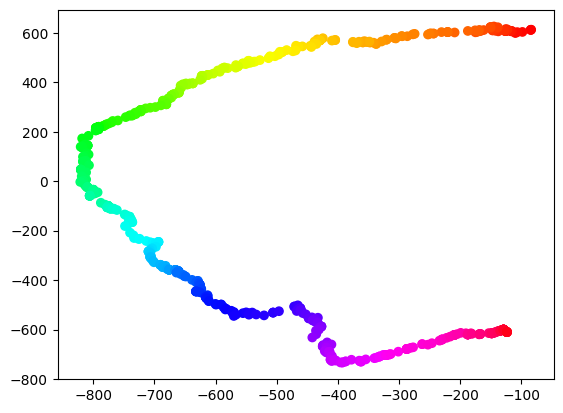

In [5]:
fig, axs = plt.subplots()
axs.scatter(test_embedding_2d[:, 0], test_embedding_2d[:, 1], cmap="hsv", c=phases)
plt.show()


In [6]:
import importlib
importlib.reload(generate_1d)
with torch.no_grad():
    _, pred_phases, _ = generate_1d.encode_decode_cost(encoder_2d, decoder_2d, phases_torch)
pred_phases = pred_phases.cpu().numpy()

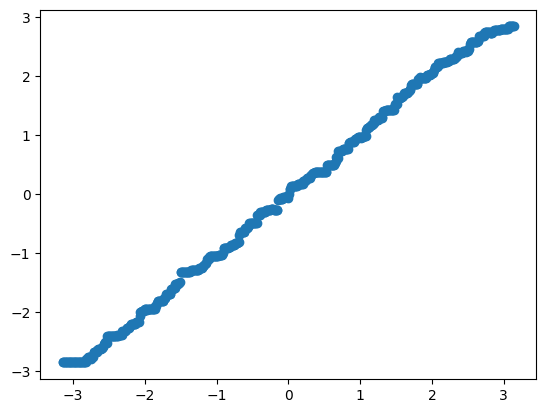

In [7]:
%matplotlib inline
fig, axs = plt.subplots()
axs.scatter(phases, pred_phases)

In [8]:
encoder_3d, decoder_3d, _ = generate_1d.train(0, 1, 3, device, n_training_iterations=5000)


iteration: 0, decoding loss: 1.7482702732086182, distance cost: 0.06908190995454788
iteration: 1, decoding loss: 1.1444257497787476, distance cost: 0.0857149213552475
iteration: 2, decoding loss: 0.9408801198005676, distance cost: 0.15465888381004333
iteration: 3, decoding loss: 0.8725982904434204, distance cost: 0.1761464923620224
iteration: 6, decoding loss: 0.7787365317344666, distance cost: 0.22962962090969086
iteration: 7, decoding loss: 0.7571316361427307, distance cost: 0.2373473048210144
iteration: 97, decoding loss: 0.9422380924224854, distance cost: 0.04853959009051323
iteration: 100, decoding loss: 0.9286864399909973, distance cost: 0.05257521942257881
iteration: 101, decoding loss: 0.9171245694160461, distance cost: 0.047476716339588165
iteration: 102, decoding loss: 0.9013851284980774, distance cost: 0.05250723287463188
iteration: 103, decoding loss: 0.8960520625114441, distance cost: 0.04636155441403389
iteration: 104, decoding loss: 0.8569048047065735, distance cost: 0.0

In [9]:
with torch.no_grad():
    test_embedding_3d = encoder_3d(phases_torch)
test_embedding_3d = test_embedding_3d.cpu().numpy()

In [10]:
%matplotlib tk
proj_fig = plt.figure()
proj_axs = proj_fig.add_subplot(projection="3d")
proj_axs.scatter(test_embedding_3d[:, 0], test_embedding_3d[:, 1], test_embedding_3d[:, 2], cmap="hsv", c=phases)
plt.show()


In [12]:
encoder_high, decoder_high, _ = generate_1d.train(0, 1, 12, device, n_training_iterations=5000)


iteration: 0, decoding loss: 1.5026379823684692, distance cost: 0.04319822043180466
iteration: 1, decoding loss: 0.8400673270225525, distance cost: 0.010207310318946838
iteration: 4, decoding loss: 0.760263204574585, distance cost: 0.05827176570892334
iteration: 111, decoding loss: 0.7774231433868408, distance cost: 0.015370788984000683
iteration: 117, decoding loss: 0.7717031240463257, distance cost: 0.014128788374364376
iteration: 166, decoding loss: 0.7655648589134216, distance cost: 0.012829178012907505
iteration: 167, decoding loss: 0.7469984292984009, distance cost: 0.012377060949802399
iteration: 168, decoding loss: 0.7345384955406189, distance cost: 0.013775864616036415
iteration: 169, decoding loss: 0.7089818716049194, distance cost: 0.014876555651426315
iteration: 175, decoding loss: 0.681117594242096, distance cost: 0.016463028267025948
iteration: 179, decoding loss: 0.6685774326324463, distance cost: 0.02208329550921917
iteration: 183, decoding loss: 0.6608670949935913, dis

In [15]:
with torch.no_grad():
    test_embedding_high = encoder_high(phases_torch)
test_embedding_high = test_embedding_high.cpu().numpy()
test_embedding_high = test_embedding_high/np.mean(np.abs(test_embedding_high))

In [1]:
encoder, decoder, _ = decode_1d.train(test_embedding_high, 0, 1, device, integration_resamples=15)


NameError: name 'decode_1d' is not defined